In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Step 2: Load the uploaded dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Step 3: Keep only the first two columns
data = data.iloc[:, :2]
data.columns = ['label', 'text']



In [4]:
# Step 4: Drop missing or empty text entries
data.dropna(subset=['label', 'text'], inplace=True)
data['text'] = data['text'].astype(str)
data = data[data['text'].str.strip() != '']


In [5]:
# Step 5: Map labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data.dropna(subset=['label'], inplace=True)  # drop if mapping failed


In [6]:
print(data['text'].head())
print("Remaining nulls:\n", data.isnull().sum())



0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object
Remaining nulls:
 label    0
text     0
dtype: int64


In [7]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])  # 🔥 This should work now
y = data['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9820531227566404
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       1.00      0.87      0.93       186

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



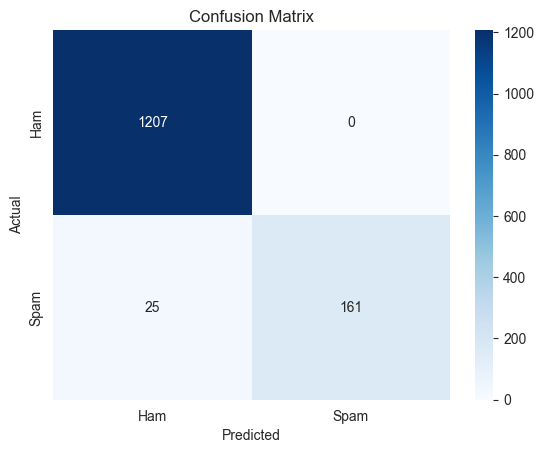

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
